In [2]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time


from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
import pyart
from pyart.filters import GateFilter
from pyart.map import grid_from_radars
#from pyart.io.sband_archive import read_sband_archive
from pyart.graph.gridmapdisplay import GridMapDisplay


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/inference.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pandas/core/tools/datetimes.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if not isinstance(key, collections.Hashable):
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.a

In [3]:

f = r"src/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2"

basedata = radar_io(f)


radar = basedata.ToPyartRadar()

z = (0, 20000.0)
y = (-200000, 200000)
x = (-200000, 200000)
gshape=(46, 251, 251)

gatefilter = GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked("reflectivity")


grid = grid_from_radars((radar,),
                        gatefilter = (gatefilter),
                        grid_shape=gshape,
                        grid_limits=(z,x,y),
                        fields = ["reflectivity"]


)

display = GridMapDisplay(grid)

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:162: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


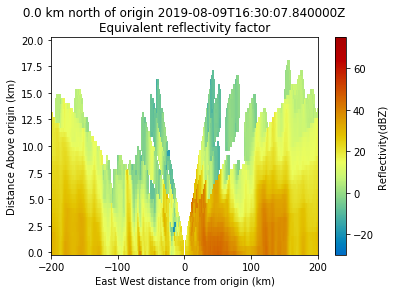

In [4]:
display.plot_latitude_slice("reflectivity",lon=121)

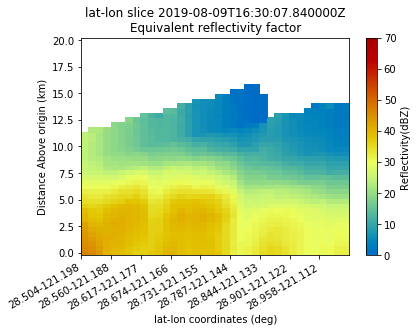

In [7]:
display.plot_latlon_slice("reflectivity", coord1=(121.2, 28.5), coord2=(121.1, 28.0),vmin=0,vmax=70)

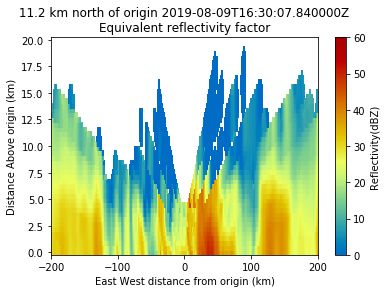

In [9]:
display.plot_latitude_slice('reflectivity', lat=28.0, vmin=0, vmax=60)

## 